<a href="https://colab.research.google.com/github/Renata-Romanelli/Challenge_Data_Science/blob/main/Alura_Challenge_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alura Challenge - Data Science** 

Renata Romanelli 09/05/2022

E-mail: reromanelli.c@gmail.com

Github: https://github.com/Renata-Romanelli

## Week 2

Challenges:
- Analisar a variável target: Churn
- Analisar a distribuição da variável target: Churn
- Criar visualizações relevantes em relação ao Churn
- Analisar a correlação entre as variáveis
- Testar diferentes tipos de gráfico 


In [ ]:
import pandas as pd

data = pd.read_csv('https://github.com/Renata-Romanelli/Challenge_Data_Science/blob/main/AluraVoz_Client_data_clean%20(1).csv?raw=true')
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges_daily,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,2.80,Yes,Mailed check,83.9,267.40


In [ ]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'Charges_daily', 'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [ ]:
data.Churn = data.Churn.map({'Yes':'Yes', 'No':'No', 'No information':'undefined'})
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Charges_daily,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,2.80,Yes,Mailed check,83.9,267.40


In [ ]:
#Import plot libraries 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
Churn_frequency = data.Churn.value_counts(normalize=True)*100
print(Churn_frequency)

fig1 = px.bar(x=Churn_frequency.index, y=Churn_frequency.values, barmode='group', text_auto=True)

No           71.198569
Yes          25.719004
undefined     3.082427
Name: Churn, dtype: float64


No           71.198569
Yes          25.719004
undefined     3.082427
Name: Churn, dtype: float64


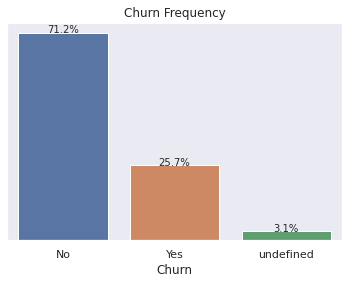

In [ ]:
Churn_frequency = data.Churn.value_counts(normalize=True)*100
print(Churn_frequency)

fig1 = sns.barplot(x=Churn_frequency.index, y=Churn_frequency.values)
fig1.set_ylabel('(%)')
fig1.set_xlabel('Churn')
fig1.set_title('Churn Frequency')
fig1.axes.get_yaxis().set_visible(False)

percentage = [Churn_frequency[0], Churn_frequency[1], Churn_frequency[2]]
patches = fig1.patches
for bar in range(len(patches)):
  x = patches[bar].get_x() + patches[bar].get_width()/2
  y = patches[bar].get_height() + .05
  fig1.annotate('{:.1f}%'.format(percentage[bar]), (x,y), ha='center')

The Churn rate in 25.7% can be considered high. It is necessary to identify the possible causes.  

## **Churn vs. Gender**

In [ ]:
gender_frequency = data.gender.value_counts()
display(gender_frequency)

crosstab_churn_gender = pd.crosstab(data.Churn, data.gender).reset_index()
crosstab_churn_gender.Female = round((crosstab_churn_gender.Female/crosstab_churn_gender.Female.sum())*100,2)
crosstab_churn_gender.Male = round((crosstab_churn_gender.Male/crosstab_churn_gender.Male.sum())*100,2)
print('Percentage:')
display(crosstab_churn_gender)

Male      3675
Female    3592
Name: gender, dtype: int64

Percentage:


gender,Churn,Female,Male
0,No,70.96,71.43
1,Yes,26.14,25.31
2,undefined,2.90,3.27


In [ ]:
fig2 = px.bar(crosstab_churn_gender, x='Churn', y=['Male','Female'], barmode='group', labels={'value':'count'},
              text_auto=True, title="Churn vs Gender", height=400, width=600).show()

The difference of Churn rate in between Male and Female is very small. We can conclude that gender does not have an influence in the Churn rate

## **Churn vs. SeniorCitizen**

In [ ]:
senior_frequency = data.SeniorCitizen.value_counts()
display(senior_frequency)

crosstab_churn_senior = pd.crosstab(data.Churn, data.SeniorCitizen).reset_index()
crosstab_churn_senior.Yes = round((crosstab_churn_senior.Yes/crosstab_churn_senior.Yes.sum())*100,2)
crosstab_churn_senior.No = round((crosstab_churn_senior.No/crosstab_churn_senior.No.sum())*100,2)
print('Percentage:')
display(crosstab_churn_senior)

No     6085
Yes    1182
Name: SeniorCitizen, dtype: int64

Percentage:


SeniorCitizen,Churn,No,Yes
0,No,74.08,56.35
1,Yes,22.89,40.27
2,undefined,3.02,3.38


In [ ]:
fig3 = px.bar(crosstab_churn_senior, x='Churn', y=['Yes','No'], barmode='group', labels={'value':'count'},
              text_auto=True, title="Churn vs Senior Citizen", height=400, width=600).show()

For the group that remain in the company (Churn equals 'No'), the majoriry are not seniors (74,08% aren't senior citizen) . 

For the group that left the company (Churn equals 'Yes'), the majority are seniors (40,27% are senior citien).

We can conclude that *senior citizens are more likely to leave the company than those who have less than 65 years.*

## **Churn vs. Dependents**

In [ ]:
dependents_frequency = data.Dependents.value_counts()
display(dependents_frequency)

crosstab_churn_dependents = pd.crosstab(data.Churn, data.Dependents).reset_index()
crosstab_churn_dependents.Yes = round((crosstab_churn_dependents.Yes/crosstab_churn_dependents.Yes.sum())*100,2)
crosstab_churn_dependents.No = round((crosstab_churn_dependents.No/crosstab_churn_dependents.No.sum())*100,2)
print('Percentage:')
display(crosstab_churn_dependents)

No     5086
Yes    2181
Name: Dependents, dtype: int64

Percentage:


Dependents,Churn,No,Yes
0,No,66.65,81.80
1,Yes,30.34,14.95
2,undefined,3.01,3.26


In [ ]:
fig4 = px.bar(crosstab_churn_dependents, x='Churn', y=['Yes','No'], barmode='group', labels={'value':'count'},
              text_auto=True, title="Churn vs Dependents", height=400, width=600).show()

For the group that remain in the company (Churn equals 'No'), the majoriry has dependents (81,8% has dependents) . 

For the group that left the company (Churn equals 'Yes'), the majoriry does not have dependents (30,34% does not have dependents).

We can conclude that *clients who does not have dependents are more likely to leave the company than those who has dependents.*

## **Churn vs. Phone service**

In [ ]:
PhoneService_frequency = data.SeniorCitizen.value_counts()
display(PhoneService_frequency)

crosstab_churn_phone = pd.crosstab(data.Churn, data.Dependents).reset_index()
crosstab_churn_phone.Yes = round((crosstab_churn_phone.Yes/crosstab_churn_phone.Yes.sum())*100,2)
crosstab_churn_phone.No = round((crosstab_churn_phone.No/crosstab_churn_phone.No.sum())*100,2)
print('Percentage:')
display(crosstab_churn_phone)

No     6085
Yes    1182
Name: SeniorCitizen, dtype: int64

Percentage:


Dependents,Churn,No,Yes
0,No,66.65,81.80
1,Yes,30.34,14.95
2,undefined,3.01,3.26


In [ ]:
fig5 = px.bar(crosstab_churn_phone, x='Churn', y=['Yes','No'], barmode='group', labels={'value':'count'},
              text_auto=True, title="Churn vs PhoneService", height=400, width=600).show()

Clients with phone service are more likely to remain in the company



## **Churn vs. Tenure**

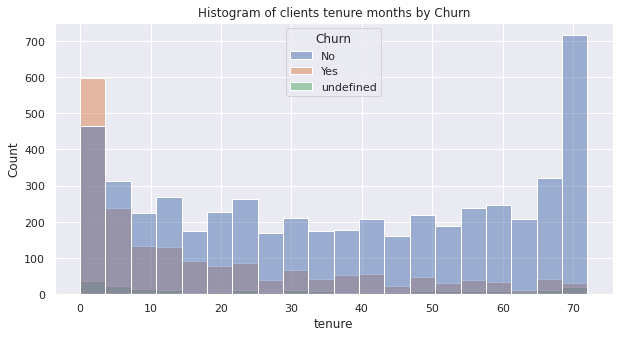

In [ ]:
plt.figure(figsize=(10,5))
fig6 = sns.histplot(data=data, x='tenure', hue='Churn', bins=20).set(title='Histogram of clients tenure months by Churn')

Churn occurs most often in customers with little plan time, around 10 to 20 months of contract.

## **Churn vs. Mulyiple Lines**


In [ ]:
crosstab_churn_MultLines = pd.crosstab(data.Churn, data.MultipleLines).reset_index()
crosstab_churn_MultLines.Yes = round((crosstab_churn_MultLines.Yes/crosstab_churn_MultLines.Yes.sum())*100,2)
crosstab_churn_MultLines.No = round((crosstab_churn_MultLines.No/crosstab_churn_MultLines.No.sum())*100,2)
crosstab_churn_MultLines['No phone service'] = round((crosstab_churn_MultLines.No/crosstab_churn_MultLines.No.sum())*100,2)

fig5 = px.bar(crosstab_churn_MultLines, x='Churn', y=['Yes','No','No phone service'], barmode='group', labels={'value':'count'},
              text_auto=True, title="Churn vs MultipleLines", height=400, width=750).show()

Churn rate is very similar for all the groups, we can conclude that this variable do not have an influence in Churn.

## **Churn vs. Charges Monsthly**

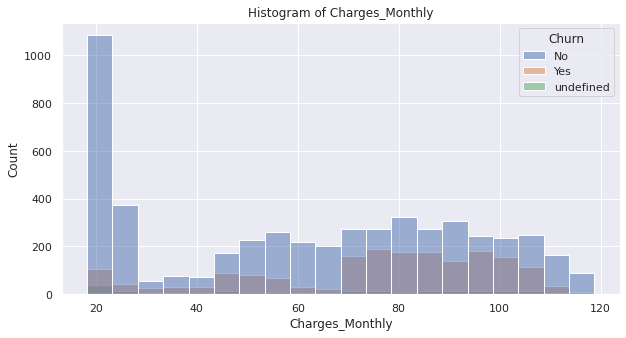

In [ ]:
plt.figure(figsize=(10,5))
fig6 = sns.histplot(data=data, x='Charges_Monthly', hue='Churn', bins=20).set(title='Histogram of Charges_Monthly')

Churn rate is higher in interval between charges 70 and 110 

## **Correlation between variables**

In [ ]:
# Label encoding function:
def label_encoding(categorical_col):
  # alters dtype "object" to "category"
  encode = categorical_col.astype('category')

  # atribui a cada categoria um valor numérico diferente
  return encode.cat.codes

In [ ]:
data_encoded = data.copy()
data_encoded.select_dtypes(include=object).columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

In [ ]:
data_encoded.drop('customerID', axis=1, inplace=True)
data_encoded_cols = data_encoded.select_dtypes(include=object).columns
data_encoded_cols

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
for col in data_encoded_cols:
  data_encoded[col] = label_encoding(data_encoded[col])

In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int8   
 1   gender            7267 non-null   int8   
 2   SeniorCitizen     7267 non-null   int8   
 3   Partner           7267 non-null   int8   
 4   Dependents        7267 non-null   int8   
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int8   
 7   MultipleLines     7267 non-null   int8   
 8   InternetService   7267 non-null   int8   
 9   OnlineSecurity    7267 non-null   int8   
 10  OnlineBackup      7267 non-null   int8   
 11  DeviceProtection  7267 non-null   int8   
 12  TechSupport       7267 non-null   int8   
 13  StreamingTV       7267 non-null   int8   
 14  StreamingMovies   7267 non-null   int8   
 15  Contract          7267 non-null   int8   
 16  Charges_daily     7267 non-null   float64


### Correlation and Heatmap

In [ ]:
corr_matrix = data_encoded.corr()

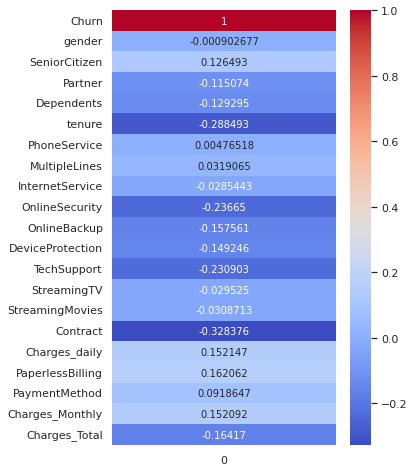

In [ ]:
df = pd.DataFrame(corr_matrix.Churn.values,
                  corr_matrix.Churn.index)

plt.figure(figsize=(5,8))
sns.heatmap(df, annot=True, fmt="g", cmap='coolwarm')